In [28]:
import os
import json
import pandas as pd
import matplotlib.pyplot  as plt
import folium
from folium.plugins import MarkerCluster
import mplleaflet

AIS_path = r'.\Data'
AIS_data = []

# Iterate over files in the directory
for file_name in os.listdir(AIS_path):
    # Construct full file path
    file_path = os.path.join(AIS_path, file_name)
    
    # Check if the path is a file (not a directory)
    if os.path.isfile(file_path):
        # Open and read the file
        with open(file_path) as f:
            # Load JSON data from the file
            json_data = json.load(f)
            # Append loaded data to the list
            AIS_data.append(json_data)

# Normalize the JSON data
data_normalized = pd.json_normalize(AIS_data, 'data')

# Now you can work with your DataFrame 'data_normalized'
data_normalized

,navigation.draught,navigation.time,navigation.speed,navigation.heading,navigation.location.long,navigation.location.lat,navigation.course,navigation.destination.name,navigation.destination.eta,navigation.status,device.dimensions.to_port,device.dimensions.to_bow,device.dimensions.to_stern,device.dimensions.to_starboard,device.mmsi,vessel.callsign,vessel.subtype,vessel.type,vessel.imo,vessel.name
0,3.0,2021-01-01T00:04:34+00:00,0.0,NaN,4.59392,51.68819,16.8,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
1,3.0,2021-01-01T00:10:34+00:00,0.0,NaN,4.59381,51.68838,8.7,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
2,3.0,2021-01-01T00:16:34+00:00,0.0,NaN,4.59402,51.68827,11.6,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
3,3.0,2021-01-01T00:16:34+00:00,0.0,NaN,4.59402,51.68827,11.6,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
4,3.0,2021-01-01T00:22:33+00:00,0.0,NaN,4.59388,51.68833,2.1,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80009,0.0,2021-01-31T23:36:56+00:00,0.0,NaN,4.42844,51.89566,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80010,0.0,2021-01-31T23:41:57+00:00,0.0,NaN,4.42844,51.89567,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80011,0.0,2021-01-31T23:46:57+00:00,0.0,NaN,4.42843,51.89567,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80012,0.0,2021-01-31T23:51:57+00:00,0.0,NaN,4.42843,51.89566,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE


In [29]:
# data_normalized['vessel.type'].unique()
data_normalized['vessel.name'].unique()
# data_normalized['navigation.status'].unique()
# data_normalized['navigation.destination.name'].unique()
# data_normalized['navigation.location.long'].unique()

data_normalized['vessel.name'].value_counts()

TRUDIE            8909
JORDY-M           8906
CHARLOIS          8721
LEVANTE           8202
WESTERSCHELDE     7469
ROMEE             7198
JAN LEEGHWATER    7009
CAAN              7008
HELENA            6414
AARBURG           6339
ORION             1982
SUNMI             1128
MARIBO MAERSK      691
MAYVIEW MAERSK      25
CHARL                5
MKXTG C              2
8ELENA               1
JORDY CD1            1
"5FPV                1
MARIB                1
QE0>0                1
TRUDIH&'L            1
Name: vessel.name, dtype: int64

In [30]:
data_normalized = data_normalized.drop_duplicates(subset=['vessel.imo', 'navigation.time'], keep='last')
# data_normalized

# df = data_normalized[(data_normalized['navigation.status'] == 'moored') | (data_normalized['navigation.status'] == 'at-anchor')]
# df

# Filter DataFrame based on the range of coordinates
# Define the range of coordinates to keep
min_lat = 51.8
max_lat = 52.1
min_lon = 3.8
max_lon = 4.6

filtered_df = data_normalized[(data_normalized['navigation.location.lat'] >= min_lat) & (data_normalized['navigation.location.lat'] <= max_lat) &
                (data_normalized['navigation.location.long'] >= min_lon) & (data_normalized['navigation.location.long'] <= max_lon)]
filtered_df

df = filtered_df[(data_normalized['navigation.status'] == 'moored') | (data_normalized['navigation.status'] == 'at-anchor')]
df

# data_normalized

C:\Users\romyl\AppData\Local\Temp\ipykernel_25136\2602605650.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = filtered_df[(data_normalized['navigation.status'] == 'moored') | (data_normalized['navigation.status'] == 'at-anchor')]


,navigation.draught,navigation.time,navigation.speed,navigation.heading,navigation.location.long,navigation.location.lat,navigation.course,navigation.destination.name,navigation.destination.eta,navigation.status,device.dimensions.to_port,device.dimensions.to_bow,device.dimensions.to_stern,device.dimensions.to_starboard,device.mmsi,vessel.callsign,vessel.subtype,vessel.type,vessel.imo,vessel.name
101,2.5,2021-01-01T00:06:28+00:00,0.0,NaN,4.00828,51.95784,252.0,MAASVLAKTE,2021-12-31T16:59:00+00:00,moored,7,120,15,4,211560210,DB4165,None,cargo,0,AARBURG
102,2.5,2021-01-01T00:09:29+00:00,0.0,NaN,4.00827,51.95786,255.3,MAASVLAKTE,2021-12-31T16:59:00+00:00,moored,7,120,15,4,211560210,DB4165,None,cargo,0,AARBURG
104,2.5,2021-01-01T00:12:28+00:00,0.0,NaN,4.00828,51.95784,251.7,MAASVLAKTE,2021-12-31T16:59:00+00:00,moored,7,120,15,4,211560210,DB4165,None,cargo,0,AARBURG
105,2.5,2021-01-01T00:24:29+00:00,0.0,NaN,4.00828,51.95786,269.7,MAASVLAKTE,2021-12-31T16:59:00+00:00,moored,7,120,15,4,211560210,DB4165,None,cargo,0,AARBURG
106,2.5,2021-01-01T00:30:29+00:00,0.0,NaN,4.00829,51.95782,272.2,MAASVLAKTE,2021-12-31T16:59:00+00:00,moored,7,120,15,4,211560210,DB4165,None,cargo,0,AARBURG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78587,2.5,2021-01-31T23:26:15+00:00,0.0,NaN,4.03464,51.95739,0.0,RDAM MAASVLAKTE RDAM,2021-06-18T20:00:00+00:00,moored,6,111,0,6,244630718,,None,cargo,0,JORDY-M
78588,2.5,2021-01-31T23:32:16+00:00,0.0,NaN,4.03464,51.95739,0.0,RDAM MAASVLAKTE RDAM,2021-06-18T20:00:00+00:00,moored,6,111,0,6,244630718,,None,cargo,0,JORDY-M
78589,2.5,2021-01-31T23:38:13+00:00,0.0,NaN,4.03464,51.95739,0.0,RDAM MAASVLAKTE RDAM,2021-06-18T20:00:00+00:00,moored,6,111,0,6,244630718,,None,cargo,0,JORDY-M
78591,2.5,2021-01-31T23:44:16+00:00,0.0,NaN,4.03464,51.95739,0.0,RDAM MAASVLAKTE RDAM,2021-06-18T20:00:00+00:00,moored,6,111,0,6,244630718,,None,cargo,0,JORDY-M


In [31]:
# df['vessel.callsign'].unique()
# df['device.mmsi'].unique()
# df['vessel.imo'].unique()

# Deze is waarschijnlijk het meest betrouwbaar gezien schepen echt hun eigen naam hebben. Niemand gebruikt dubbele namen.
df['vessel.name'].unique()
df['vessel.name'].value_counts()

JORDY-M          5518
ROMEE            1752
CAAN             1524
AARBURG           906
MARIBO MAERSK     649
ORION             559
MKXTG C             2
JORDY CD1           1
"5FPV               1
MARIB               1
QE0>0               1
Name: vessel.name, dtype: int64

In [32]:
vessel_name_counts = df['vessel.name'].value_counts()
df = df[df['vessel.name'].isin(vessel_name_counts.index[vessel_name_counts > 2])]

df

,navigation.draught,navigation.time,navigation.speed,navigation.heading,navigation.location.long,navigation.location.lat,navigation.course,navigation.destination.name,navigation.destination.eta,navigation.status,device.dimensions.to_port,device.dimensions.to_bow,device.dimensions.to_stern,device.dimensions.to_starboard,device.mmsi,vessel.callsign,vessel.subtype,vessel.type,vessel.imo,vessel.name
101,2.5,2021-01-01T00:06:28+00:00,0.0,NaN,4.00828,51.95784,252.0,MAASVLAKTE,2021-12-31T16:59:00+00:00,moored,7,120,15,4,211560210,DB4165,None,cargo,0,AARBURG
102,2.5,2021-01-01T00:09:29+00:00,0.0,NaN,4.00827,51.95786,255.3,MAASVLAKTE,2021-12-31T16:59:00+00:00,moored,7,120,15,4,211560210,DB4165,None,cargo,0,AARBURG
104,2.5,2021-01-01T00:12:28+00:00,0.0,NaN,4.00828,51.95784,251.7,MAASVLAKTE,2021-12-31T16:59:00+00:00,moored,7,120,15,4,211560210,DB4165,None,cargo,0,AARBURG
105,2.5,2021-01-01T00:24:29+00:00,0.0,NaN,4.00828,51.95786,269.7,MAASVLAKTE,2021-12-31T16:59:00+00:00,moored,7,120,15,4,211560210,DB4165,None,cargo,0,AARBURG
106,2.5,2021-01-01T00:30:29+00:00,0.0,NaN,4.00829,51.95782,272.2,MAASVLAKTE,2021-12-31T16:59:00+00:00,moored,7,120,15,4,211560210,DB4165,None,cargo,0,AARBURG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78587,2.5,2021-01-31T23:26:15+00:00,0.0,NaN,4.03464,51.95739,0.0,RDAM MAASVLAKTE RDAM,2021-06-18T20:00:00+00:00,moored,6,111,0,6,244630718,,None,cargo,0,JORDY-M
78588,2.5,2021-01-31T23:32:16+00:00,0.0,NaN,4.03464,51.95739,0.0,RDAM MAASVLAKTE RDAM,2021-06-18T20:00:00+00:00,moored,6,111,0,6,244630718,,None,cargo,0,JORDY-M
78589,2.5,2021-01-31T23:38:13+00:00,0.0,NaN,4.03464,51.95739,0.0,RDAM MAASVLAKTE RDAM,2021-06-18T20:00:00+00:00,moored,6,111,0,6,244630718,,None,cargo,0,JORDY-M
78591,2.5,2021-01-31T23:44:16+00:00,0.0,NaN,4.03464,51.95739,0.0,RDAM MAASVLAKTE RDAM,2021-06-18T20:00:00+00:00,moored,6,111,0,6,244630718,,None,cargo,0,JORDY-M


In [33]:
df['vessel.type'].value_counts()

cargo    7632
other    3276
Name: vessel.type, dtype: int64

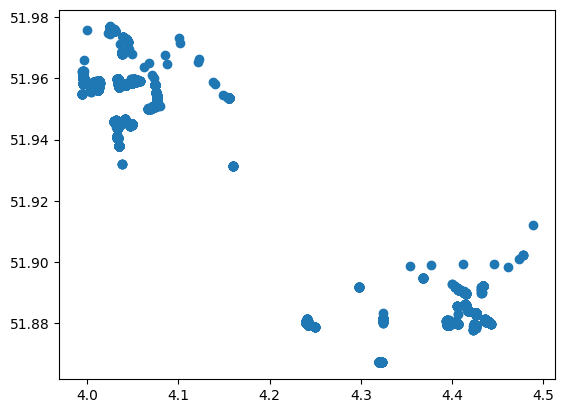

In [34]:
all_locations = plt.scatter(df['navigation.location.long'], df['navigation.location.lat'])

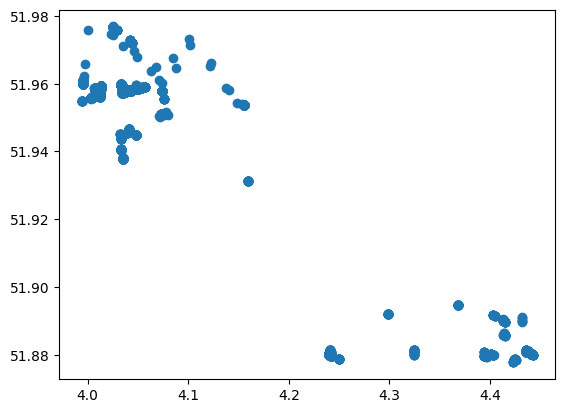

In [35]:
df_test1 = df[(df['vessel.type'] == 'cargo')]
locations = plt.scatter(df_test1['navigation.location.long'], df_test1['navigation.location.lat'])

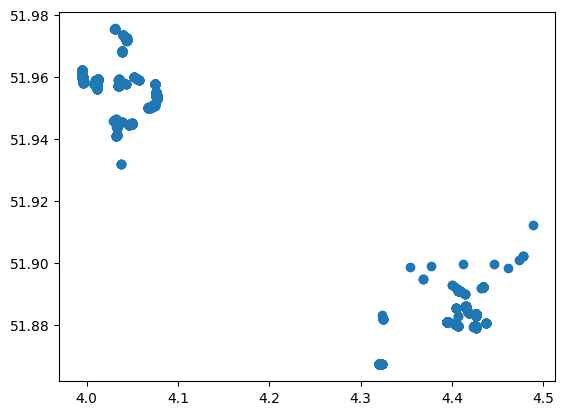

In [36]:
df_test2 = df[(df['vessel.type'] == 'other')]
locations = plt.scatter(df_test2['navigation.location.long'], df_test2['navigation.location.lat'])

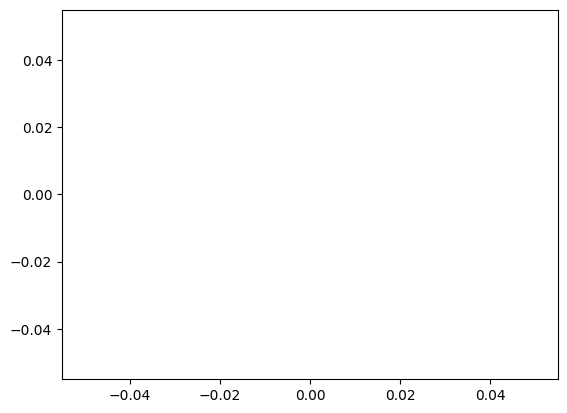

In [37]:
df_test3 = df[(df['vessel.type'] == 'dredging-underwater-ops')]
locations = plt.scatter(df_test3['navigation.location.long'], df_test3['navigation.location.lat'])

In [38]:
# Create a folium map centered at the mean latitude and longitude
map_center = [df['navigation.location.lat'].mean(), df['navigation.location.long'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

marker_cluster = MarkerCluster().add_to(m)

for index, row in df.iterrows():
    folium.Marker(location=[row['navigation.location.lat'], row['navigation.location.long']]).add_to(marker_cluster)

scatter_html = mplleaflet.fig_to_html(plt.gcf())

# # Create a folium iframe to embed the scatterplot HTML
scatter_frame = folium.IFrame(html=scatter_html, width=500, height=300)
scatter_popup = folium.Popup(scatter_frame, max_width=500)

# Add the scatterplot as a popup to the folium map
folium.Marker(location=map_center, popup=scatter_popup).add_to(m)
    
m.save('filtered_data.html')
# m
